# Exploring How Age and Cholesterol Can Classify Heart Disease Patients from Cleveland

#### Gabbi Villarica

# Introduction

This project proposal investigates and analyzes the 1988 UC Irvine Machine Repository dataset on Heart Disease from the Cleveland database. The aim of the dataset was to determine the presence of heart disease in patients and see how various factors contribute to Heart Disease.

The term Heart Disease encompasses a range of conditions that affect the heart (Mayo Clinic, 2022). Coronary Heart Disease is one type that affects the blood supply to the heart, which, through excess cholesterol buildup or plaque, constricts proper blood flow to the heart and can subsequently lead to a heart attack, stroke, or chest pain (Mayo Clinic, 2022). High blood pressure puts strain on the heart to work harder and pump blood throughout the body causing the lower left ventricle to thicken and grow large which, can increase risk of heart failure (Mayo Clinic, 2023). Moreover, it is common with age for there to be changes to the heart and blood vessels. The heart's main artery, the aorta, becomes thicker and less flexible which causes high blood pressure (MedlinePlus, 2022).

This project will follow a predictive question which asks: ***Based on a patient's age and cholesterol levels, will they be diagnosed with a heart disease?*** 

I used the `processed.cleveland.data dataset` from the Heart Disease database from 1988. The creators noted that the Cleveland database is commonly used by data scientists which influenced my decision to use this data. This dataset is used to predict if a patient based on a multitude of variables, will have heart disease. The relevant columns in the dataset for this data anlysis include:
1. Age (`age`) 
5. Cholesterol (`chol`)
14. Diagnosis of heart disease (`num`, 1-4 = heart disease presence, 0 = no presence) 

# Methods and Results

Load the following libraries in order to gain access to the necessary packages we will use in R to perform the data analysis.

In [1]:
# load the necessary libraries into R before continuing.
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Read-in and clean the data into a tidy format

Use the `read_csv` function in order to load the "processed.cleveland.data" using its relative path string to be passed into R. 

Since the original dataset had no column names, I used the `col_names` function to set each variable/column where each would be labelled with an X value. I then used the `rename` function to assign each X value its proper column name listed from the Heart Disease datasite. Looking at the full dataset, some rows contained unknown values ("?") indicating missing data. To deal with that, I used the `filter` function to remove rows with missing data. The analysis can still proceed as there are plenty of data left to work with.

In [2]:
set.seed(16)

# read the dataset into R.
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)

# rename the columns
cleveland_data <- rename(cleveland_data, age = X1, sex = X2, cp = X3, trestbps = X4, chol = X5, fbs = X6, restecg = X7, thalach = X8, exang = X9, oldpeak = X10, slope = X11, ca = X12, thal = X13, num = X14)
cleveland_data

# filter out the unknown values (?) from the data.
cleveland_filtered <- filter(cleveland_data, ca != "?", thalach != "?")


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


#### *Table 1*

Based on my predictive question, since I am only interested in how age and cholesterol predictors can classify heart disease, I will use the `select` function to create a new dataframe with the relevant columns: `age`, `chol`, and `num`. 

As `num` is the class label variable (varible of interest) and is currently set as a `<dbl>`, I will change it to a factor (`<fct>`) variable to reflect my predictive question which seeks whether or not a patient has a diagnosis. I do this by using the `as_factor` function under the `mutate` function. As the `num` column previously was a `<dbl>` and contained a range of values from 0-4 where 0 indicates no diagnosis and 1-4 indicates presence of a diagnosis, I simplify this by turning `num` into a binary where 0 represents no diagnosis or "False" and 1-4 represents a diganosis or simplyl "True".   

In [3]:
set.seed(16)

# select the relevant columns (age, chol, num)
cleveland_selected <- select(cleveland_filtered, age, chol, num) |> 
    arrange(age)

# wrangle the data, set num to either True/False
cleveland_wrangled <- cleveland_selected |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "False" = "0", "True" = "1", "True" = "2", "True" = "3", "True" = "4"))
cleveland_wrangled


age,chol,num
<dbl>,<dbl>,<fct>
29,204,False
34,182,False
34,210,False
35,183,False
35,198,True
⋮,⋮,⋮
71,265,False
71,149,False
74,269,False


#### *Table 2*

### Split the data into a training set and a testing set

Before creating the model, I need to first split the data into training and testing sets. Splitting them now will ensure we can only work on the training set first. Using the `initial_split` function from the `tidymodels` package, I will split my dataframe into 75% training and 25% testing where majority of the data is in the training set to train a more accurate model (with more data) while having enough test data left to evaluate the performance. This function shuffles the data to prevent any previous ordering from influencing the split, and stratifies the data to ensure enough data of each class (TRUE/FALSE) has a fair chance in appearing in either set. 

In [4]:
# split dataset into training + testing
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

### Summarize the data to show the means of the predictor variables

To see the differences in the averages of each predictor variable, I will use `group_by` and `summarize` to form a table of the mean for each predictor. 

In [5]:
#summarize data using the mean.

cleveland_summarize <- cleveland_train |>
    group_by(num) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE)
              )
cleveland_summarize


num,mean_age,mean_chol
<fct>,<dbl>,<dbl>
False,52.07500,241.2750
True,56.71845,251.4757


#### *Table 3*

Based on the mean values from *Table 3*, it shows that patients with heart disease tend to be a bit older on average and have a higher cholesterol.

### Plotting the data in a histogram

In order to visualize the relationship between age and cholesterol versus heart disease diagnosis, I will use the `ggplot` function. Using the `geom_histogram` function will allow me to separately see the distinction between the two predictors by looking at the count and how the counts of each might suggest a correlation with the number of heart disease diagnoses, and distinguishing between TRUE/FALSE with colour.

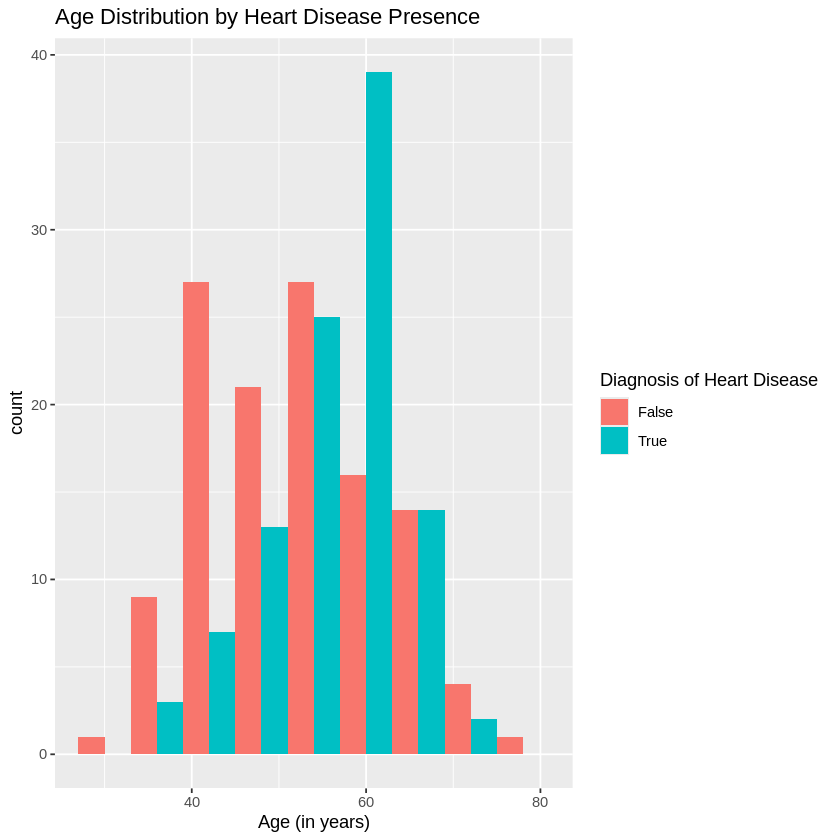

In [6]:
#plot the data using a histogram plot.

cleveland_plot_1 <- ggplot(cleveland_train, aes(x = age, fill = as_factor(num))) + 
    geom_histogram(binwidth = 6, position = "dodge") +
    labs(x = "Age (in years)", fill = "Diagnosis of Heart Disease", 
        title = "Age Distribution by Heart Disease Presence")
cleveland_plot_1


#### *Figure 1*

In *Figure 1*, with an increase in age there seems to be a higher count of heart disease diagnosis which peaks at a height of patients around roughly 60 years with a count at around 38. Past this peak, there seems to be a drop in the number of patients with heart disease. This visualization is somewhat consistent with the predictive question, that with an increase in age, there will be a higher likelihood for heart disease.

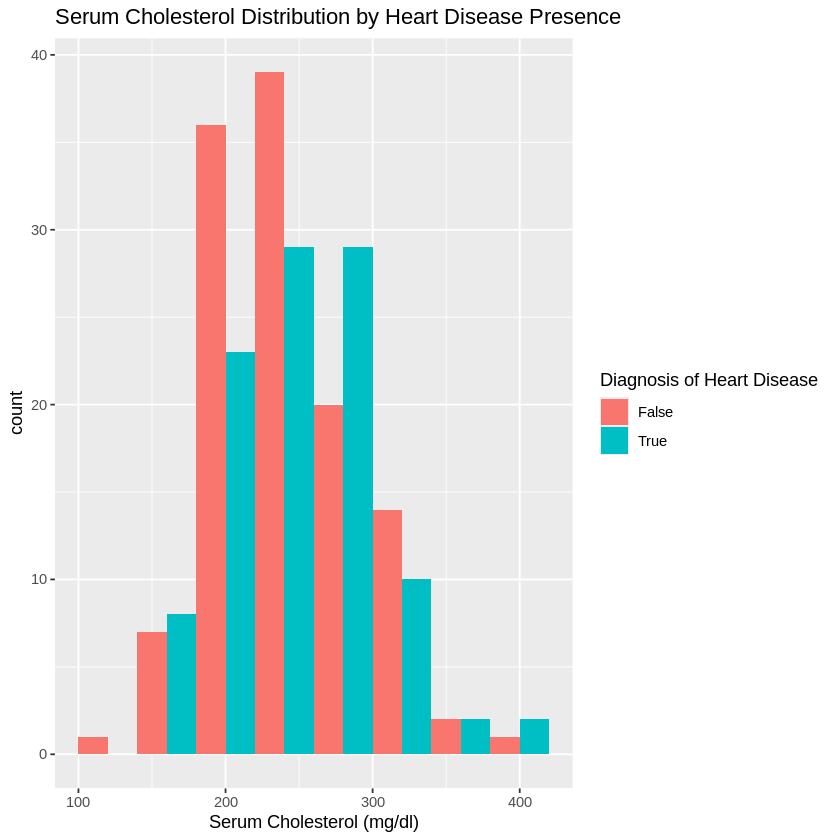

In [7]:
cleveland_plot_2 <- ggplot(cleveland_train, aes(x = chol, fill = as_factor(num))) +
    geom_histogram(binwidth = 40, position = "dodge") +
    labs(x = "Serum Cholesterol (mg/dl)", fill = "Diagnosis of Heart Disease", 
        title = "Serum Cholesterol Distribution by Heart Disease Presence")
cleveland_plot_2

#### *Figure 2*

From *Figure 2*, there seems to be less of a strong peak in heart disease diagnosis counts, however, there still seems to be a bell-shape for patients who do have a heart diagnosis, peaking at around a cholesterol of 250 to 300. After this peak, however, there seems to be a drop as serum cholesterol increases past this. 

<!-- summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to? -->

### Building the model 

To build my model, I need to use the training set. I reprinted my splitting of the data into training/testing as a personal reminder. I then started by creating a recipe using the `recipe` function to predict `num`, and again used the `cleveland_train` set from earlier and standardize the data using `step_scale` and `step_center`. 

I then created my model specification using K-nearest neighbors setting `neighbors = tune()` since we want to find the best value for K (the neighbors). I also `set_mode` to "classification" as my variable of interest is a categorical variable (`num` as either TRUE or FALSE) and no longer numeric. 

To cross-validate my data, I used the `vfold_cv` function to automatically split my training data into 5 equal parts, and set `strata` to `num`, the categorical label variable.

Finally, I created my workflow using the `workflow()` function using `tune_grid` to pass through `grid` and then used the `filter` function to filter for all the accuracies.


In [8]:
# set seed to ensure data is reproducible.
set.seed(16)

# split dataset into training + testing
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

# standardize the data.
cleveland_recipe <- recipe(num ~ age + chol, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# train the classifier.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# split the training data for cross-validation using vfold.
cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = num)



In [9]:
set.seed(16)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5)) 

# fit the K-nn model.
knn_results <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = cleveland_vfold, grid = k_vals) |>
    collect_metrics()

# compute the accuracy
accuracies <- knn_results |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))
accuracies

neighbors,mean
<dbl>,<dbl>
96,0.6501010
91,0.6454545
61,0.6322222
41,0.6320202
86,0.6320202
⋮,⋮
26,0.6007071
16,0.6005051
11,0.5918182


#### *Table 4*

Table 4 shows that k = 96 gives a 65% accuracy. I will use this table to create a line graph in order to visualize accuracy for a range of k values.

To visualize the best k that yields the best accuracy, I use `ggplot` to plot accuracy vs k.

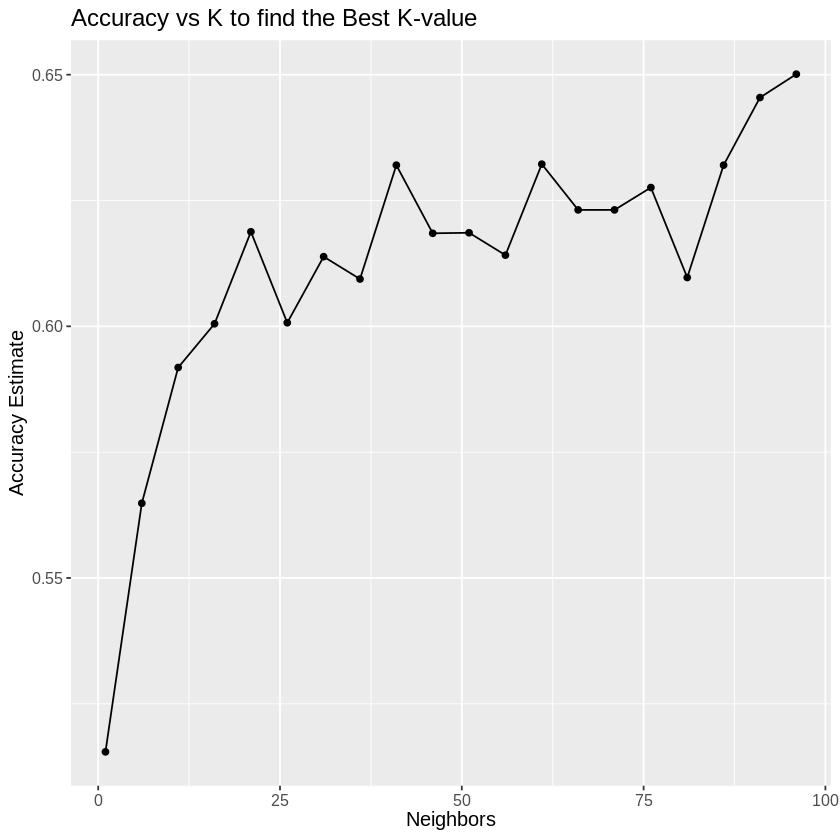

In [10]:
# visualize plot to find the best K.

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy vs K to find the Best K-value") +
    theme(text = element_text(size = 12)) 
accuracy_vs_k


#### *Figure 3*

Figure 3 shows that k = 96 yields the highest accuracy at 65%. To confirm the best k, I used the `accuracies` dataframe and used the `neighbors` variable to find where the mean or average is at its highest.

In [11]:
# find the best K.

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

[1] 96

### Evaluating predictions on the test set

Now that I have tuned my K-nn classifier and identified the best k where k = 96, I can now evaluate the quality of the predicitons on the test set. 

To start, I need to re-train the K-nn clasifier using the best k. To do this, I just re-printed my recipe from before. I then created a new model specification using `best_k`, and passed this new object into a new workflow and fit it into `cleveland_train`. 


In [12]:
set.seed(16)

k_lots <- tibble(neighbors = seq(from = 1, to = 173, by = 10))

# use the recipe from before
cleveland_recipe <- recipe(num ~ chol + age, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# re-train the K-nn classifier where k = 96
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# create a new workflow with the new model using the best k
fit_best_k <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = cleveland_train)
fit_best_k


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(96,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3721973
Best kernel: rectangular
Best k: 96

### Estimating the accuracy of the classifier using the test data 

I used the `predict` function while using the `fit_best_k` and testing data and then used the `metrics` function to look at its accuracy. 

In [13]:
set.seed(16)

# predict the accuracy
cleveland_test_predictions <- predict(fit_best_k, cleveland_test) |>
    bind_cols(cleveland_test)
cleveland_test_predictions

# find the accuracy
cleveland_test_predictions |>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.pred_class,age,chol,num
<fct>,<dbl>,<dbl>,<fct>
False,38,231,True
False,41,214,False
False,41,306,False
False,42,265,False
False,43,247,False
⋮,⋮,⋮,⋮
True,69,239,False
True,69,234,False
True,70,322,True


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5921053


#### *Table 5*, *Table 6*

The `.pred_class` column in Table 5 shows all the predictions the model made. Table 6 summarizes these results and shows that the model was 59% accurate (compared to the predicted 65% accuracy from earlier). These results can be confirmed in a confusion matrix, which can succinctly list all the predictions the model got right and wrong and evaluate the overall accuracy of the classifier.

In [14]:
cleveland_test_predictions |>
    precision(truth = num, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.65625


#### *Table 7*

The model has a precision of roughly 65.6% meaning that it correctly predicted positive observations 66% of the time.  

In [15]:
cleveland_test_predictions |>
    recall(truth = num, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5121951


#### *Table 8*

In [16]:
set.seed(16)

# confusion matrix
confusion <- cleveland_test_predictions |>
    conf_mat(truth = num, estimate = .pred_class)
confusion

          Truth
Prediction False True
     False    21   11
     True     20   24

#### *Table 9*

The confusion matrix shows that the model got 45 correct predictions out of 76 total predictions which is consistent with Table 6, yielding a 59.2% accuracy. The classifier also labelled 20 observations as TRUE rather than FALSE indicating false positives. On the other hand, it listed 11 observations as FALSE than TRUE, indicating false negatives. 

# Discussion 

I expected to find older patients and those with higher cholesterol to be more at risk for heart disease and thus expected my model to fit this prediction and yield a higher accuracy. The resulting model somewhat supported this expectation, yet leaves room for further questioning and revision. Initially starting off at 65% accuracy using the training set, when using the testing set, the model dropped to an accuracy of 59.2%, roughly a 6% drop which was not too consistent with my expectations. One would think older patients would be more at risk for heart disease as with age, the body's anatomy tends to change and disintegrate, strainig the heart and cardiovascular system. Likewise, I expected those with higher cholesterol to be more at risk for heart disease as cholesterol buildup can intervene with proper blood flow. However, when assessing these results, I now wonder how the `age` predictor might have tampered with my model's accuracy, as the relationship between age and heart disease alone can be weak with no other predictors present. As a multitude of other factors related to heart disease can develop as one ages, age as a predictor variable can be ambiguous. 

With that considered and assessing the results of my classifier from the confusion matrix above, we can see how the classifier listed *more* observations as TRUE than FALSE, 20, which is almost double that of its listing 11 observations as FALSE than TRUE. The 20 false predictions are called *False Positives* and the 11 false predictions are called *False Negatives*. While having more False Negatives for a classifier might be more risky especially when assessing health conditions, when considering this classifier that has more False Positives, this might impact the precision and reliability of the model's effectiveness. It could also lead to patients who have been falsely diagnosed to undergo treatment they otherwise wouldn't need had the classifier been accurate in its diagnosis. Heart Disease medications, when taken unnecessarily, might also risk a patient's health ("Heart Failure", 2022). Moreover, the presence of False Negatives, which was roughly 15% and while lower, still poses a risk for patients with a presence of a disease to continue bheaviours that would worsen their health conditions. 

When assessing the model and the above, future questions this model could include are discovering if another predictor paired with `age` might yield a higher accuracy in a reformed model. Another question could include finding what might be an "optimal" combination and number of predictors, with or without age, that data scientists could use to build a model and create a higher accuracy?


# References

Heart Failure: Avoiding Medicines That Make Symptoms Worse | HealthLink BC. (2022, September 7). https://www.healthlinkbc.ca/illnesses-conditions/heart-health-and-stroke/heart-failure-avoiding-medicines-make-symptoms-worse

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Mayo Clinic. (2022, August 25). Heart Disease - Symptoms and Causes. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Mayo Clinic. (2023, November 28). How high blood pressure can affect the body. https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868

MedlinePlus. (2022, July 21). Aging changes in the heart and blood vessels. https://medlineplus.gov/ency/article/004006.htm
